# Tratamento da base dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import io

In [5]:
base_credit = pd.read_csv('credit_card_clients.csv', header = 1)
base_credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


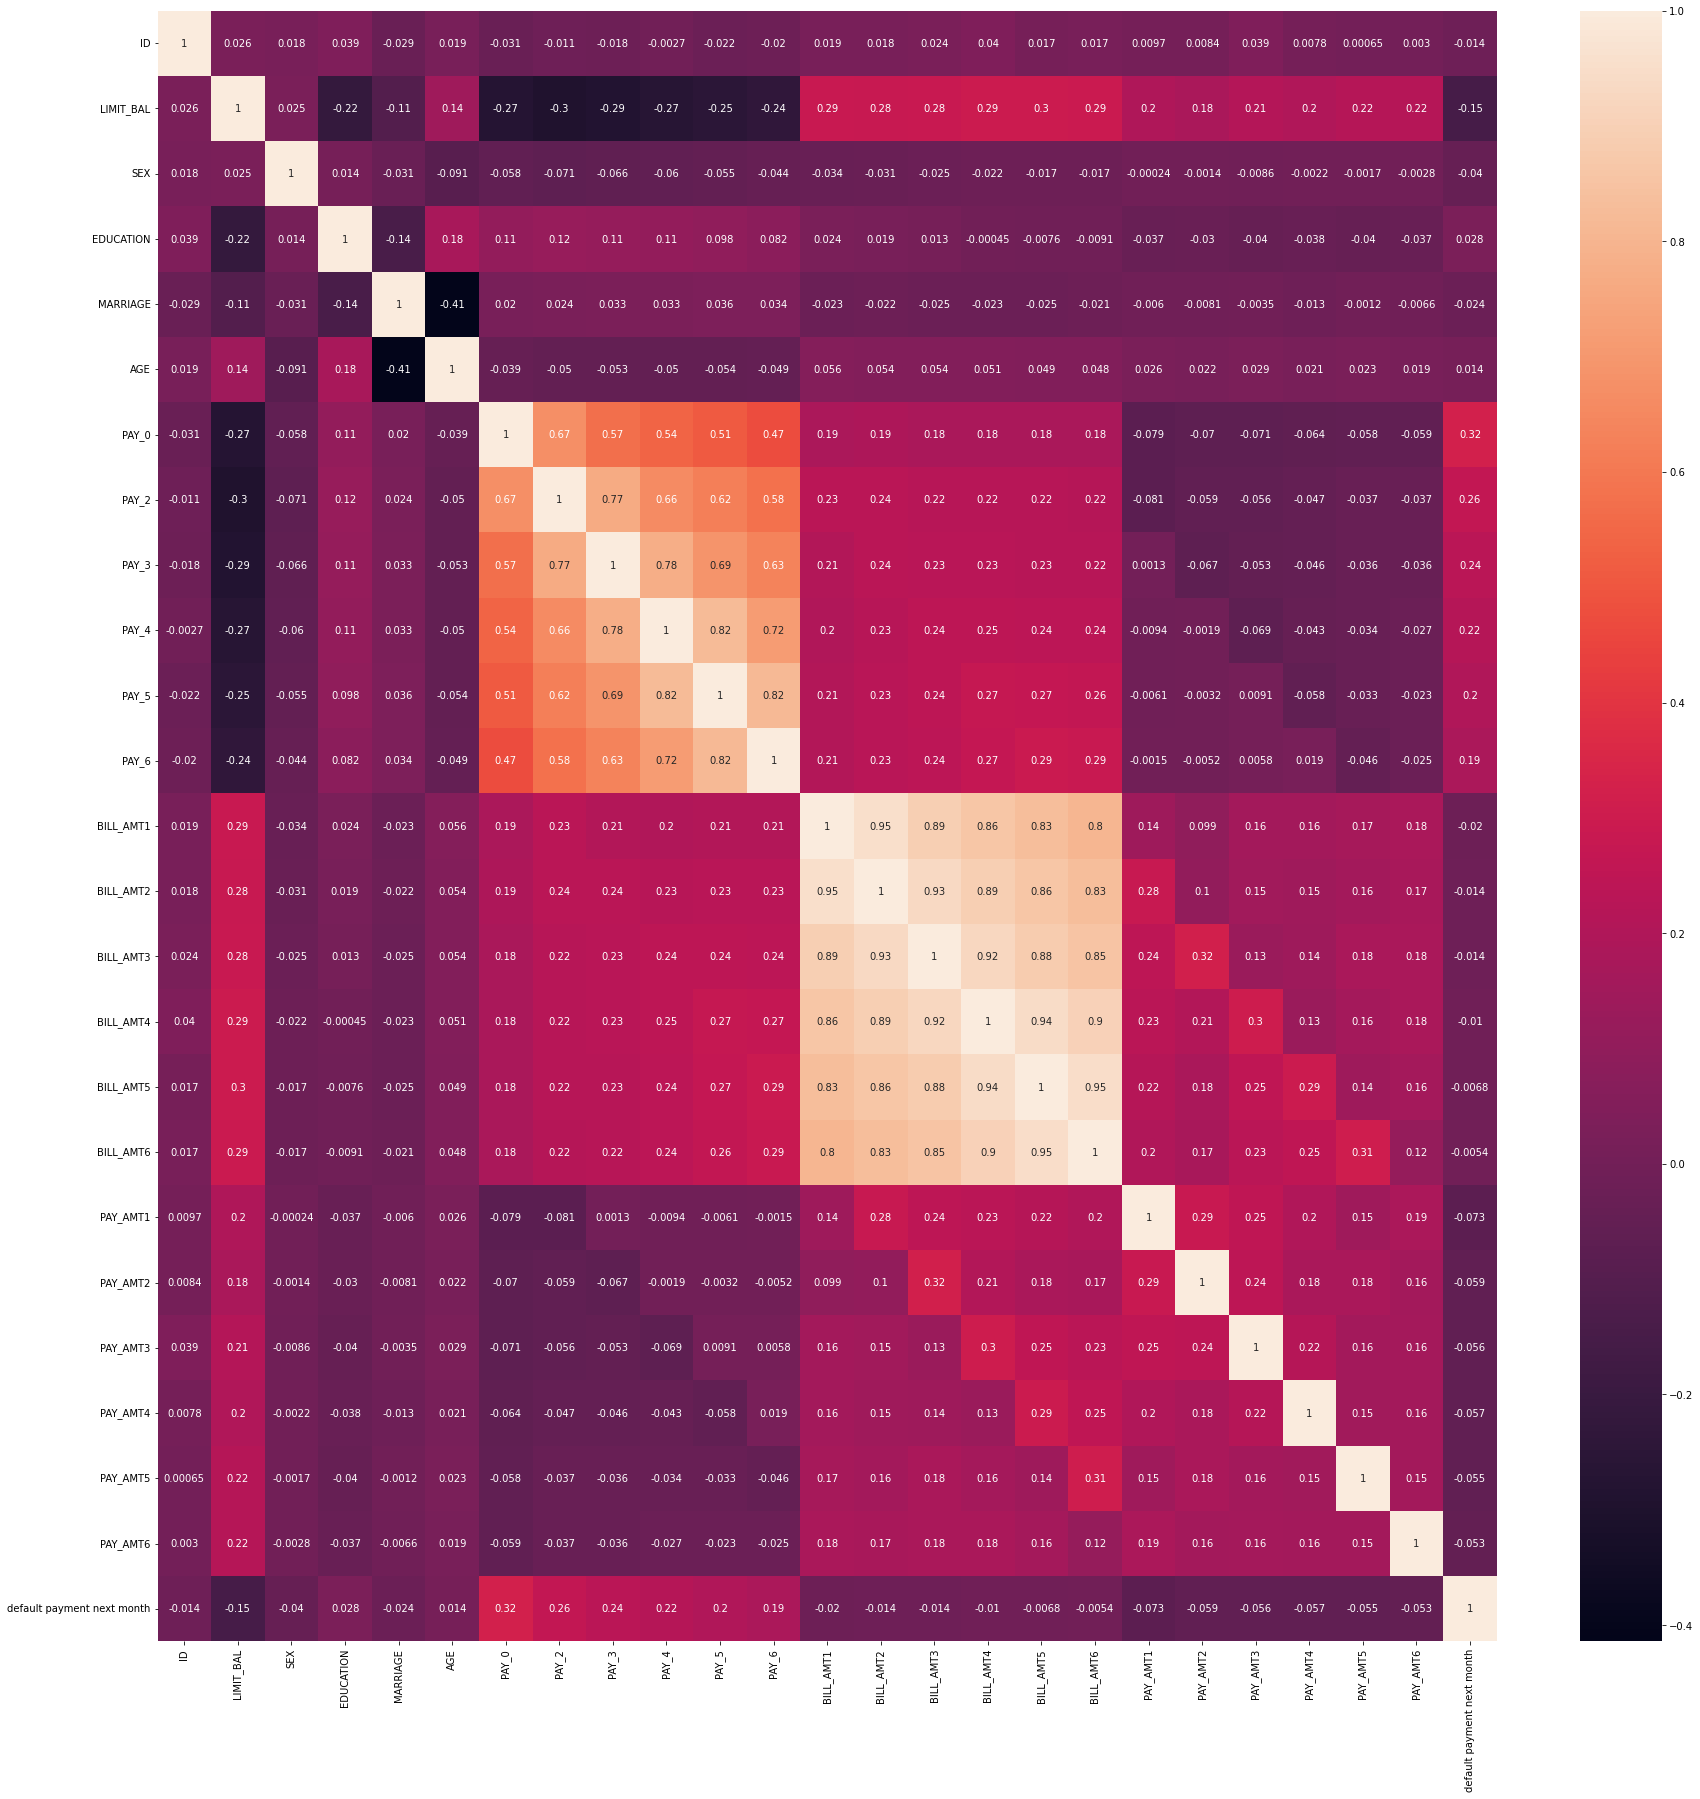

In [6]:
figura = plt.figure(figsize=(30,30))
sns.heatmap(base_credit.corr(), annot=True);

In [7]:
base_credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
X = base_credit.iloc[:, 1:len(base_credit.columns)].values
X

array([[ 20000,      2,      2, ...,      0,      0,      1],
       [120000,      2,      2, ...,      0,   2000,      1],
       [ 90000,      2,      2, ...,   1000,   5000,      0],
       ...,
       [ 30000,      1,      2, ...,   2000,   3100,      1],
       [ 80000,      1,      3, ...,  52964,   1804,      1],
       [ 50000,      1,      2, ...,   1000,   1000,      1]])

In [9]:
X.shape

(30000, 24)

In [10]:
X[0]

array([20000,     2,     2,     1,    24,     2,     2,    -1,    -1,
          -2,    -2,  3913,  3102,   689,     0,     0,     0,     0,
         689,     0,     0,     0,     0,     1])

In [11]:
X = np.array(X).astype('float32')
X[0]

array([ 2.000e+04,  2.000e+00,  2.000e+00,  1.000e+00,  2.400e+01,
        2.000e+00,  2.000e+00, -1.000e+00, -1.000e+00, -2.000e+00,
       -2.000e+00,  3.913e+03,  3.102e+03,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00], dtype=float32)

# Configurações do SageMaker

In [12]:
import sagemaker
import boto3
from sagemaker import Session

In [13]:
session = sagemaker.Session()
bucket = 'cursoawssagemaker'
subpasta_modelo = 'modelos/credit-card/pca'
subpasta_dataset = 'datasets/credit-card'
key_train = 'credit-card-train-data-pca'
role = sagemaker.get_execution_role()
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, key_train)
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)
print('Role: ', role)
print('Localização da base de dados de treinamento: ', s3_train_data)
print('Modelo final será salvo em: ', output_location)

Role:  arn:aws:iam::936535973187:role/service-role/AmazonSageMaker-ExecutionRole-20220510T125992
Localização da base de dados de treinamento:  s3://cursoawssagemaker/datasets/credit-card/train/credit-card-train-data-pca
Modelo final será salvo em:  s3://cursoawssagemaker/modelos/credit-card/pca/output


In [14]:
import sagemaker.amazon.common as smac
buffer = io.BytesIO()
smac.write_numpy_to_dense_tensor(buffer, X)
buffer.seek(0)

0

In [15]:
boto3.resource('s3').Bucket(bucket).Object(os.path.join(subpasta_dataset, 'train', key_train)).upload_fileobj(buffer)

# Treinamento do PCA

In [16]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/ecr-sa-east-1.html
container = sagemaker.image_uris.retrieve(framework = 'pca', region = boto3.Session().region_name)

In [17]:
# https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html
pca = sagemaker.estimator.Estimator(image_uri = container,
                                    role = role,
                                    instance_count = 1,
                                    instance_type = 'ml.c4.xlarge',
                                    output_path = output_location,
                                    sagemaker_session = session)

In [18]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/PCA-reference.html
pca.set_hyperparameters(feature_dim = 30000,
                        num_components = 2,
                        mini_batch_size = 200)

In [19]:
s3_train_data

's3://cursoawssagemaker/datasets/credit-card/train/credit-card-train-data-pca'

In [21]:
pca.fit({'train': s3_train_data})

2022-05-24 14:24:26 Starting - Starting the training job...
2022-05-24 14:24:50 Starting - Preparing the instances for trainingProfilerReport-1653402266: InProgress
.........
2022-05-24 14:26:17 Downloading - Downloading input data......
2022-05-24 14:27:24 Training - Training image download completed. Training in progress.
2022-05-24 14:27:24 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[05/24/2022 14:27:15 INFO 140286910482240] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[05/24/2022 14:27:15 INFO 140286910482240] Merging with provided configuration from /opt/ml/input/config/hyperparameters.json: {'feature_dim'

# Redução de dimensionalidade

In [22]:
pca_predictor = pca.deploy(initial_instance_count = 1, instance_type = 'ml.m4.xlarge')

------!

In [23]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
pca_predictor.serializer = CSVSerializer()
pca_predictor.deserializer = JSONDeserializer()

In [24]:
X[0]

array([ 2.000e+04,  2.000e+00,  2.000e+00,  1.000e+00,  2.400e+01,
        2.000e+00,  2.000e+00, -1.000e+00, -1.000e+00, -2.000e+00,
       -2.000e+00,  3.913e+03,  3.102e+03,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  6.890e+02,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00], dtype=float32)

In [25]:
X0_pca = pca_predictor.predict(X[0])
print(X0_pca)

{'projections': [{'projection': [75538.1015625, 166488.15625]}]}


In [26]:
X_pca = pca_predictor.predict(X)

In [ ]:
X_pca

In [27]:
X_pca = np.array([r['projection'] for r in X_pca['projections']])

In [28]:
X_pca, X_pca.shape

(array([[ 75538.1015625 , 166488.15625   ],
        [ -9780.703125  , 114226.9296875 ],
        [ 33471.33984375,  98432.3203125 ],
        ...,
        [ 77857.4609375 , 140206.109375  ],
        [ 74908.3046875 ,  41427.71875   ],
        [ 95514.109375  ,  70860.2890625 ]]),
 (30000, 2))

In [29]:
X_pca = np.array(X_pca).astype('float32')

# Treinamento do k-means

In [30]:
subpasta_modelo_kmeans = 'modelos/credit-card/kmeans'
output_location_kmeans = 's3://{}/{}'.format(bucket, subpasta_modelo_kmeans)
print('Modelo kmeans será salvo em: ', output_location_kmeans)

Modelo kmeans será salvo em:  s3://cursoawssagemaker/modelos/credit-card/kmeans


In [31]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/k-means.html
# https://docs.aws.amazon.com/sagemaker/latest/dg/k-means-api-config.html
from sagemaker import KMeans

In [32]:
kmeans = KMeans(role = role,
                instance_count = 1,
                instance_type = 'ml.c4.xlarge',
                output_path = output_location_kmeans,
                k = 4)

In [33]:
kmeans.fit(kmeans.record_set(X_pca))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2022-05-24 14:32:18 Starting - Starting the training job...
2022-05-24 14:32:42 Starting - Preparing the instances for trainingProfilerReport-1653402738: InProgress
............
2022-05-24 14:34:42 Downloading - Downloading input data...
2022-05-24 14:35:07 Training - Downloading the training image...
2022-05-24 14:35:48 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[05/24/2022 14:35:36 INFO 139820625762112] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'init_method': 'random', 'mini_batch_size': '5000', 'epochs': '1', 'extra_center_factor': 'auto', 'local_lloyd_max_iter': '300', 'local_lloyd_tol': '0.0001', 'local_lloyd_init_method': 'kmeans++', 'local_lloyd_num_trials': 'auto', 'half_life_time_size': '0', 'eval_metrics': '["msd"]', 'force_dense': 'true', '_disable_wait_to_read': 'false', '_enable_profiler': 'false', '_

# Agrupamento com o k-means

In [34]:
kmeans_predictor = kmeans.deploy(initial_instance_count = 1, instance_type = 'ml.c4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


------!

In [35]:
resultados = kmeans_predictor.predict(X_pca)

In [ ]:
resultados

In [36]:
rotulos = [r.label['closest_cluster'].float32_tensor.values[0] for r in resultados]

In [37]:
print(rotulos[0:10])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [46]:
np.unique(rotulos, return_counts = True)

(array([0., 1., 2., 3.]), array([17265,  4018,  7993,   724]))

In [38]:
base_credit.shape, len(rotulos)

((30000, 25), 30000)

In [39]:
base_credit['cluster'] = rotulos

In [40]:
base_credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cluster
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,0.0
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,0.0
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,2.0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,0.0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,0.0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,0.0


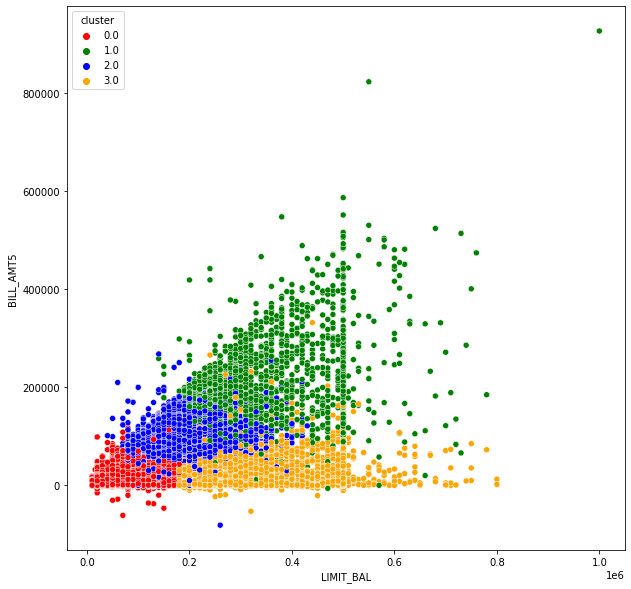

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'LIMIT_BAL', y = 'BILL_AMT5', data = base_credit, hue = 'cluster', palette = ['red', 'green', 'blue', 'orange']);

In [42]:
base_credit_3 = base_credit[base_credit['cluster'] == 3.0]
base_credit_3

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,cluster
10,11,200000,2,3,2,34,0,0,2,0,...,1828,3731,2306,12,50,300,3738,66,0,3.0
11,12,260000,2,1,2,51,-1,-1,-1,-1,...,22287,13668,21818,9966,8583,22301,0,3640,0,3.0
12,13,630000,2,2,2,41,-1,0,-1,-1,...,6500,2870,1000,6500,6500,6500,2870,0,0,3.0
18,19,360000,2,1,1,49,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,3.0
19,20,180000,2,1,2,29,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29975,29976,220000,1,2,1,41,0,0,-1,-1,...,1759,1824,8840,6643,5924,1759,1824,7022,0,3.0
29979,29980,180000,1,1,1,32,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,3.0
29985,29986,240000,1,1,2,30,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,3.0
29986,29987,360000,1,1,2,35,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,3.0


In [43]:
base_credit_3.to_csv('base_credit_3.csv')

In [44]:
# https://aws.amazon.com/pt/mxnet/
# https://aws.amazon.com/pt/mxnet/get-started/
import mxnet as mx

In [45]:
os.system('tar -zxvf model.tar.gz')

0

In [46]:
centroides = mx.ndarray.load('model_algo-1')
centroides

[
 [[  55039.164    80324.64  ]
  [  57758.04   -244078.16  ]
  [-156186.16     -3927.6455]
  [ 113281.016  -689136.8   ]]
 <NDArray 4x2 @cpu(0)>]

In [47]:
pca_predictor.delete_endpoint()
kmeans_predictor.delete_endpoint()